In [1]:
#The most versatile pokemon

In [18]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt; 
import seaborn as sns;


In [19]:
df = pd.read_csv('pokemon.csv')

In [20]:
## Data cleaning

In [21]:
df.head()

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1194 non-null   int64 
 1   image_url   1194 non-null   object
 2   Id          1194 non-null   int64 
 3   Names       1194 non-null   object
 4   Type1       1194 non-null   object
 5   Type2       652 non-null    object
 6   Total       1194 non-null   int64 
 7   HP          1194 non-null   int64 
 8   Attack      1194 non-null   int64 
 9   Defense     1194 non-null   int64 
 10  Sp. Atk     1194 non-null   int64 
 11  Sp. Def     1194 non-null   int64 
 12  Speed       1194 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 121.4+ KB


In [23]:
#The dataset is predominantly numerical

In [24]:
df.isnull().sum()

Unnamed: 0      0
image_url       0
Id              0
Names           0
Type1           0
Type2         542
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
dtype: int64

In [25]:
#Though the 542 NaN values present in the Type2 column are significant,
#we however keep the column as in fact, not all pokemons have a Type2 specification.
#we replace the NaN values with Na

In [26]:
df['Type2'].fillna('Na', inplace=True)

In [27]:
df.isnull().sum()

Unnamed: 0    0
image_url     0
Id            0
Names         0
Type1         0
Type2         0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
dtype: int64

In [28]:
#we drop the "Unnamed", "Id" and "image_url" columns
columns_to_drop = [ 'Unnamed: 0','Id', 'image_url']
df.drop(columns=columns_to_drop, inplace=True)

In [29]:
df.head()

,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,Fire,Na,309,39,52,43,60,50,65


In [40]:
# To determine the most well rounded pokemon that'll do well in battle regardless of the deck,
# we use the strategy of Assigning weights to each attribute
# (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) based on their importance in versatility. 
# Higher weights should be given to attributes that are more critical in different battle scenarios.


In [41]:
#determine the attributes most important in the determination of versatility

In [ ]:
#we determine the distribution of the different attributes

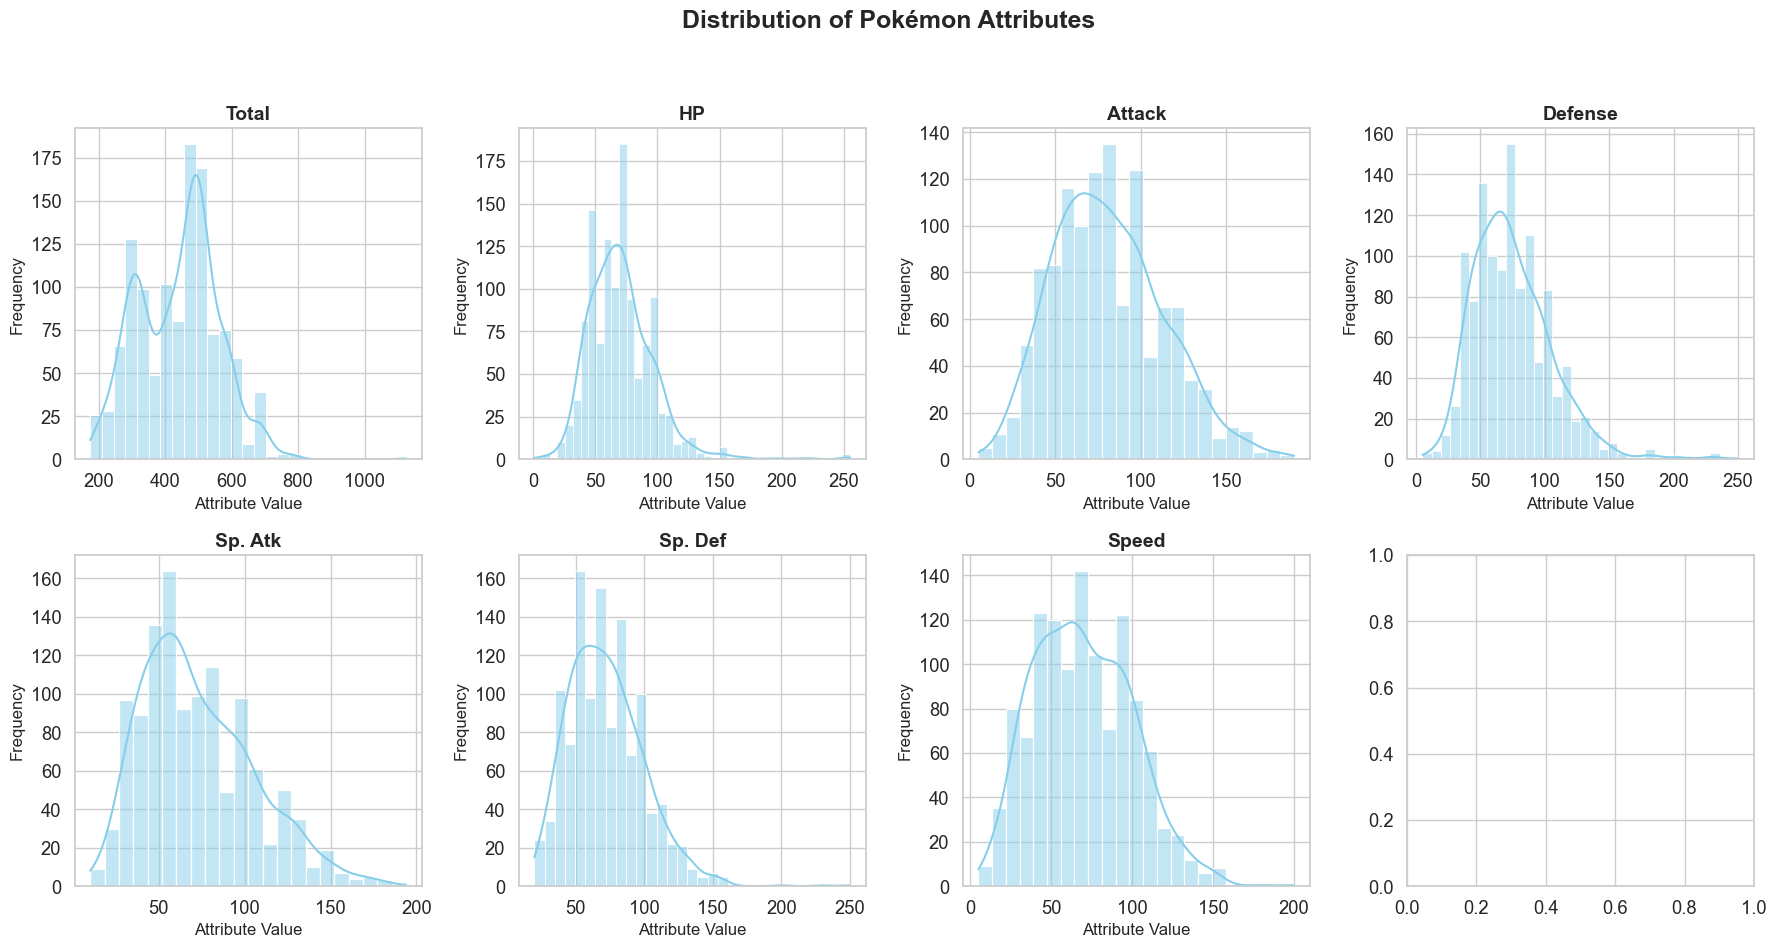

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


attributes_to_plot = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']


sns.set(style='whitegrid', palette='pastel', font_scale=1.2)


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
fig.suptitle('Distribution of Pokémon Attributes', fontsize=18, fontweight='bold')

for i, attribute in enumerate(attributes_to_plot):
    row = i // 4
    col = i % 4
    sns.histplot(df[attribute], ax=axes[row, col], kde=True, color='skyblue')
    axes[row, col].set_title(attribute, fontsize=14, fontweight='bold')
    axes[row, col].set_xlabel('Attribute Value', fontsize=12)
    axes[row, col].set_ylabel('Frequency', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [34]:
#we express the degree of skew, uniformity or normality in terms of numbers

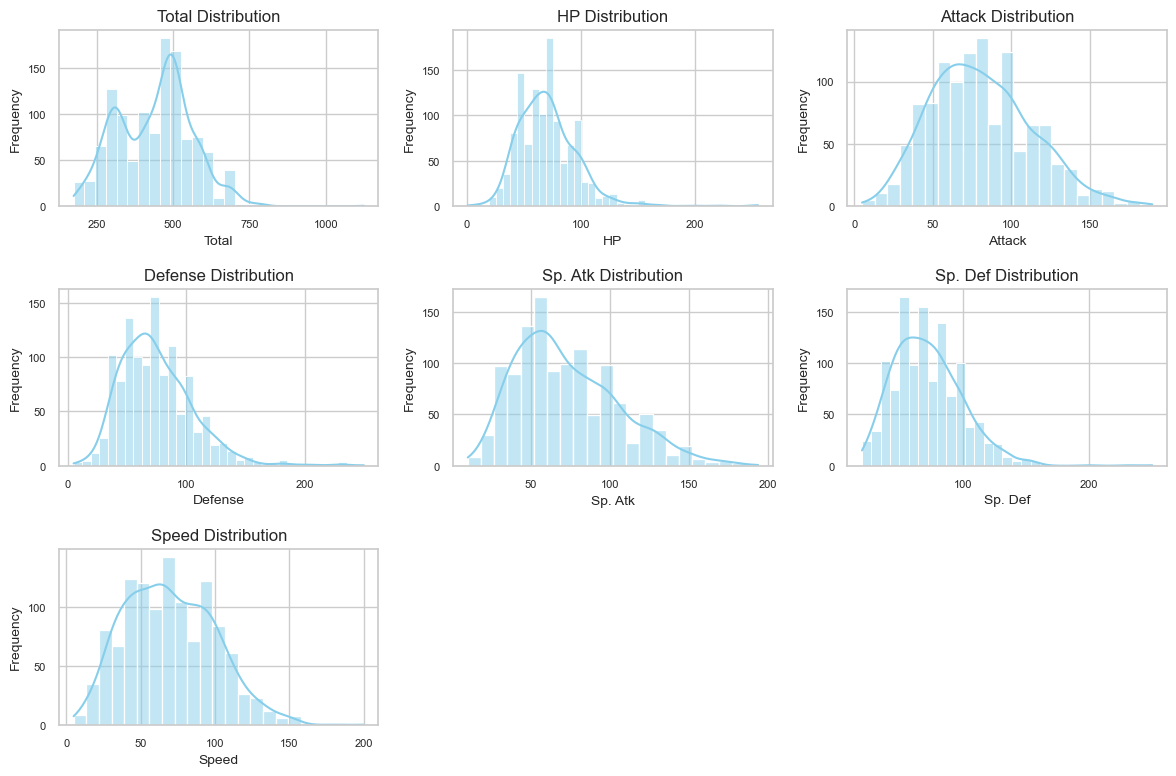


Skewness:
Total      0.146186
HP         1.640341
Attack     0.428777
Defense    1.134322
Sp. Atk    0.706036
Sp. Def    0.898635
Speed      0.378088
dtype: float64

Normality Test (p-values):
Total       6.118309e-02
HP         3.427947e-101
Attack      3.146797e-08
Defense     5.736994e-57
Sp. Atk     8.979212e-19
Sp. Def     1.002292e-41
Speed       6.972545e-07
dtype: float64


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, normaltest

h


attributes_to_analyze = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']


skewness = df[attributes_to_analyze].apply(skew)
normality_test = df[attributes_to_analyze].apply(lambda x: normaltest(x).pvalue)


plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_analyze):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[attribute], kde=True, color='skyblue')
    plt.title(f'{attribute} Distribution', fontsize=12)
    plt.xlabel(attribute, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

plt.show()


print("\nSkewness:")
print(skewness)

print("\nNormality Test (p-values):")
print(normality_test)


In [36]:
import pandas as pd


skewness = pd.Series({
    'Total': 0.146186,
    'HP': 1.640341,
    'Attack': 0.428777,
    'Defense': 1.134322,
    'Sp. Atk': 0.706036,
    'Sp. Def': 0.898635,
    'Speed': 0.378088
})

p_values = pd.Series({
    'Total': 6.118309e-02,
    'HP': 3.427947e-101,
    'Attack': 3.146797e-08,
    'Defense': 5.736994e-57,
    'Sp. Atk': 8.979212e-19,
    'Sp. Def': 1.002292e-41,
    'Speed': 6.972545e-07
})


skewness_weight = 1 - skewness.abs() 
normality_weight = 1 - p_values      


weight_skewness = 0.6
weight_normality = 0.4

weights = weight_skewness * skewness_weight + weight_normality * normality_weight


weights /= weights.sum()

print("Assigned Weights:")
print(weights)


Assigned Weights:
Total      0.235115
HP         0.004183
Attack     0.196694
Defense    0.084587
Sp. Atk    0.152639
Sp. Def    0.122036
Speed      0.204748
dtype: float64


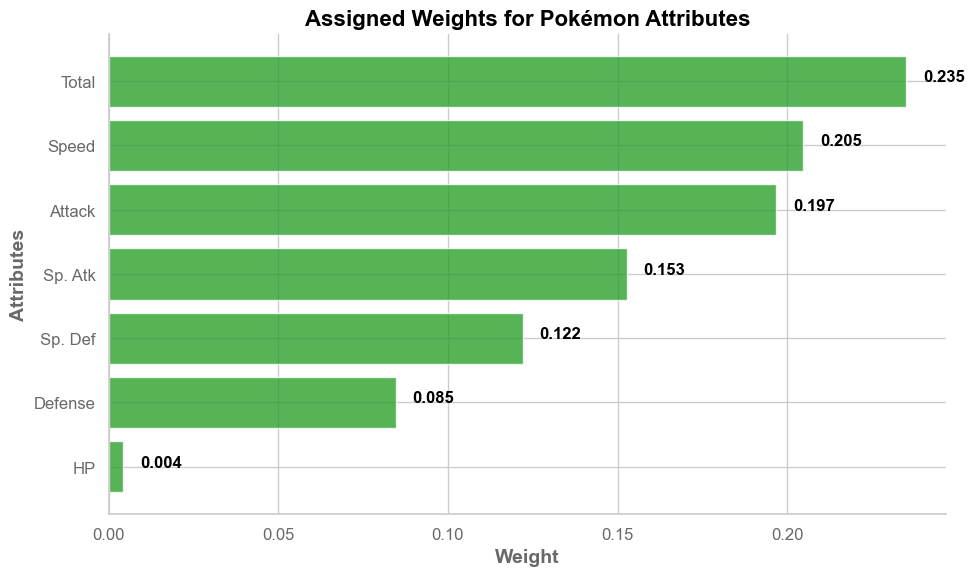

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

weights = {
    'Total': 0.235115,
    'HP': 0.004183,
    'Attack': 0.196694,
    'Defense': 0.084587,
    'Sp. Atk': 0.152639,
    'Sp. Def': 0.122036,
    'Speed': 0.204748
}
eights_df = pd.DataFrame.from_dict(weights, orient='index', columns=['Weight'])


weights_df.sort_values(by='Weight', inplace=True)


plt.figure(figsize=(10, 6))
plt.barh(weights_df.index, weights_df['Weight'], color='#2ca02c', alpha=0.8)


plt.xlabel('Weight', fontsize=14, fontweight='bold', color='dimgrey')
plt.ylabel('Attributes', fontsize=14, fontweight='bold', color='dimgrey')
plt.title('Assigned Weights for Pokémon Attributes', fontsize=16, fontweight='bold', color='black')
plt.xticks(fontsize=12, color='dimgrey')
plt.yticks(fontsize=12, color='dimgrey')


for i, v in enumerate(weights_df['Weight']):
    plt.text(v + 0.005, i, f"{v:.3f}", color='black', fontsize=12, fontweight='bold')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


plt.tight_layout()
plt.show()


In [39]:
import pandas as pd




weights = pd.Series({
    'Total': 0.235115,
    'HP': 0.004183,
    'Attack': 0.196694,
    'Defense': 0.084587,
    'Sp. Atk': 0.152639,
    'Sp. Def': 0.122036,
    'Speed': 0.204748
})


df['Versatility_Score'] = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].dot(weights)


most_versatile_pokemon = df.loc[df['Versatility_Score'].idxmax()]


print("Most Versatile Pokémon:")
print(most_versatile_pokemon[['Names', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Versatility_Score']])


Most Versatile Pokémon:
Names                Eternatus Eternamax
Total                               1125
HP                                   255
Attack                               115
Defense                              250
Sp. Atk                              125
Sp. Def                              250
Speed                                130
Versatility_Score             385.543715
Name: 1058, dtype: object


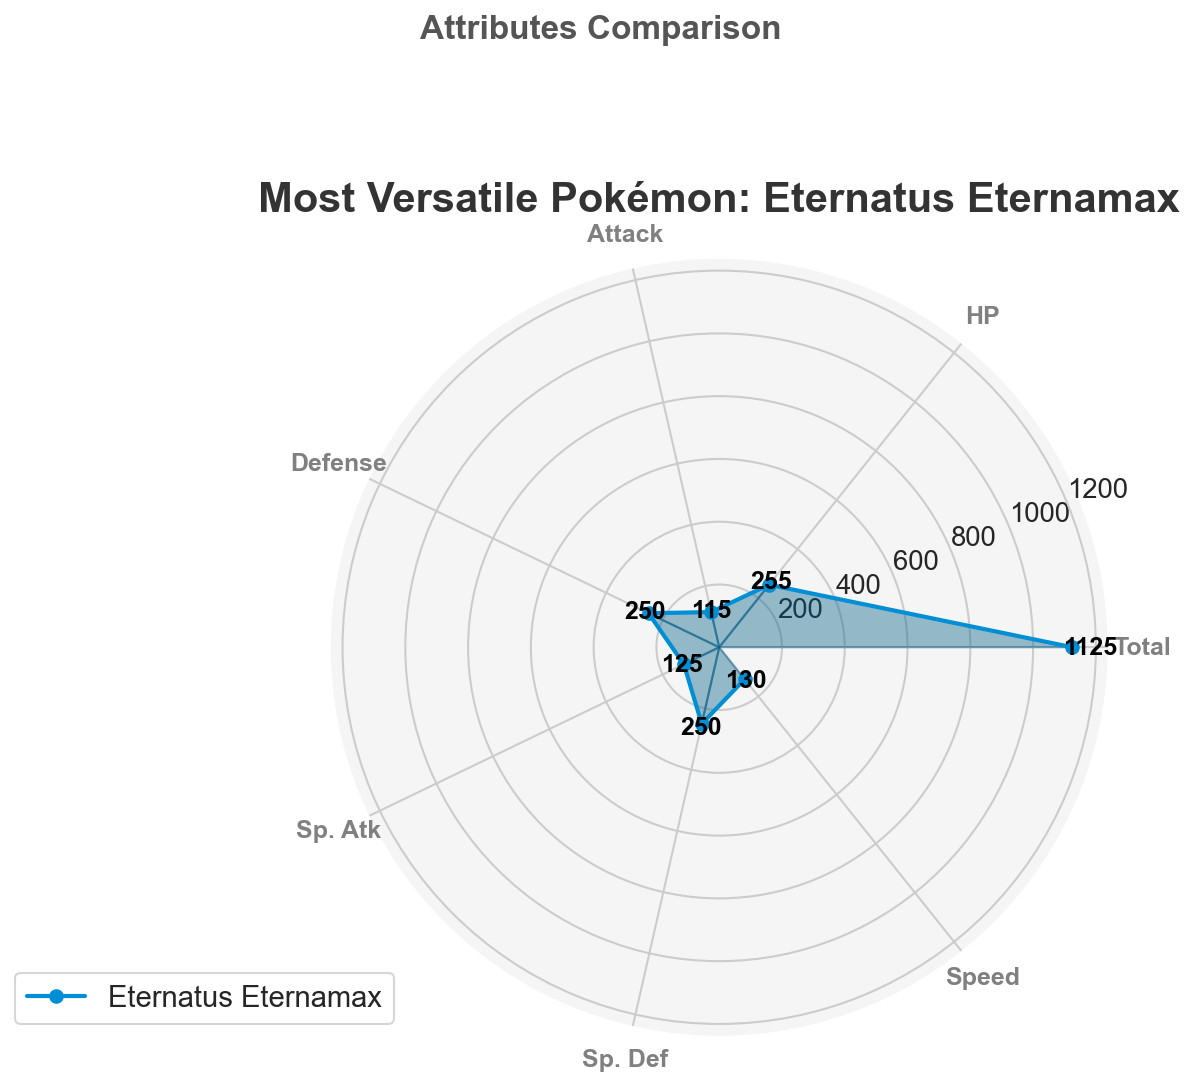

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pokemon_data = {
    'Total': 1125,
    'HP': 255,
    'Attack': 115,
    'Defense': 250,
    'Sp. Atk': 125,
    'Sp. Def': 250,
    'Speed': 130,
}


pokemon_series = pd.Series(pokemon_data)


num_attributes = len(pokemon_series)


angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False)


plt.figure(figsize=(8, 8), dpi=150)


plt.polar(angles, pokemon_series.values, marker='o', linestyle='-', color='#008fd5', linewidth=2)


gradient_colors = ['#005f89', '#008fd5']
for i in range(num_attributes - 1):
    plt.fill_between([angles[i], angles[i + 1]], [pokemon_series.values[i], pokemon_series.values[i + 1]], 0, alpha=0.4, color=gradient_colors)


plt.thetagrids(angles * 180 / np.pi, labels=pokemon_series.index, fontsize=12, color='gray', fontweight='bold', ha='center', va='center')
plt.ylim(0, max(pokemon_series.values) * 1.1)


for value, angle, attribute in zip(pokemon_series.values, angles, pokemon_series.index):
    plt.text(angle, value * 1.05, f"{value}", fontsize=12, fontweight='bold', color='black', ha='center', va='center')


plt.title('Most Versatile Pokémon: Eternatus Eternamax', fontsize=20, fontweight='bold', color='#333333')
plt.suptitle('Attributes Comparison', fontsize=16, fontweight='bold', color='#555555')


plt.gca().spines['polar'].set_visible(False)


plt.legend(['Eternatus Eternamax'], loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=14)


plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.gca().set_facecolor('#f5f5f5')


plt.show()



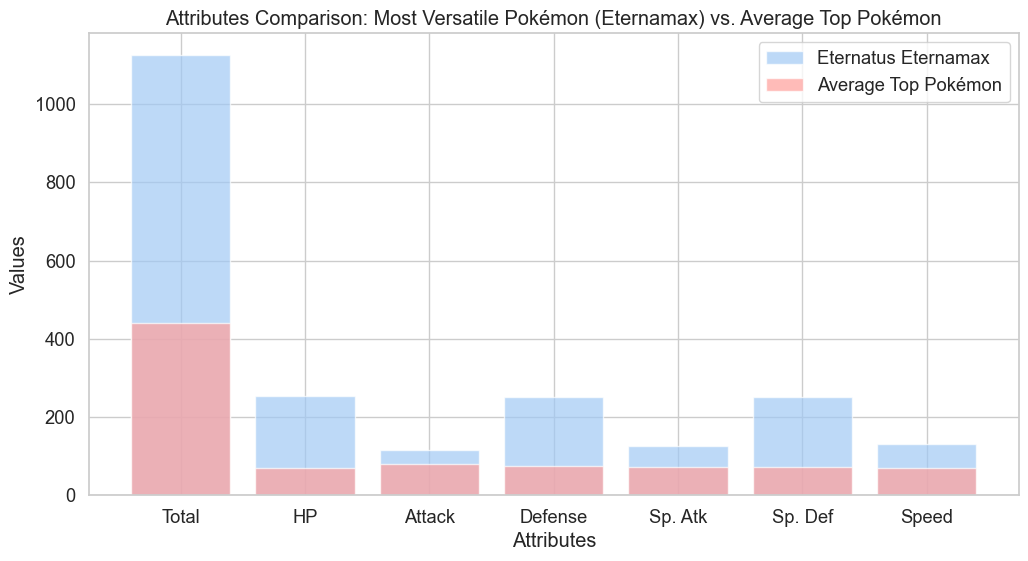

In [63]:
import pandas as pd
import matplotlib.pyplot as plt


pokemon_data = {
    'Names': ['Eternatus', 'Eternamax'],
    'Total': [1125, 1125],
    'HP': [255, 255],
    'Attack': [115, 115],
    'Defense': [250, 250],
    'Sp. Atk': [125, 125],
    'Sp. Def': [250, 250],
    'Speed': [130, 130],
}
df_most_versatile = pd.DataFrame(pokemon_data)


df_other_pokemon = pd.read_csv('pokemon.csv')


attributes_to_compare = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']


attribute_labels = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']


plt.figure(figsize=(12, 6))


plt.bar(attribute_labels, df_most_versatile[attributes_to_compare].iloc[0], color='b', alpha=0.7, label='Eternatus Eternamax')

average_attributes = df_other_pokemon[attributes_to_compare].mean()


plt.bar(attribute_labels, average_attributes, color='r', alpha=0.7, label='Average Top Pokémon')


plt.xlabel('Attributes')
plt.ylabel('Values')
plt.title('Attributes Comparison: Most Versatile Pokémon (Eternamax) vs. Average Top Pokémon')
plt.legend()


plt.show()


